In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import pickle
with open("../data/key2gspy.pkl", "rb") as ff:
    times = pickle.load(ff)

In [3]:
df = pd.read_json('../data/all_PE_v3.json')
gspy = pd.read_json('../data/gspy-1month.json')

In [4]:
' , '.join(df.keys())

'amp_r , amp_i , f0 , gbw , time , amp_r_sd , amp_i_sd , f0_sd , gbw_sd , time_sd , amp , phase , snr , power , residual , peak_frequency , ifo , ml_label , num , frequency'

In [31]:
ml_key = {'Tomte': 'tomte', 'Blip': 'blip', 'Koi_Fish' : 'koi', 'Blip_Low_Frequency': 'lowblip'}
ml_types = ['Tomte','Blip','Koi_Fish','Blip_Low_Frequency']

In [40]:
snr = lambda pwr: np.sqrt(512.*(pwr-1.))

In [6]:
tmp = [times[(val['ifo'], ml_key[val['ml_label']], val['num'])] for _, val in df.iterrows()]

In [7]:
times[('H1', 'blip', 0)]

(1241495812.178, 'YeBbB5de1x')

In [8]:
df['times'] = [x[0] for x in tmp]
df['gravityspy_id'] = [str(x[1]) for x in tmp]

In [9]:
df['gravityspy_id'] = df.gravityspy_id.astype(str)
gspy['gravityspy_id'] = gspy.gravityspy_id.astype(str)

In [10]:
df = df.merge(gspy,
                on='gravityspy_id', how='inner', suffixes=(None, '_gs'))

In [11]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")

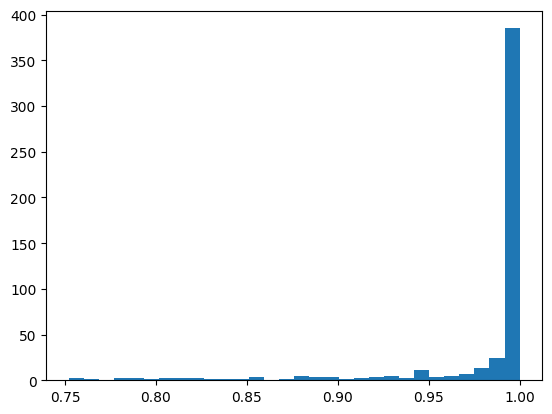

In [12]:
plt.hist(dt['ml_confidence'], bins=30);

<AxesSubplot: xlabel='snr_gs', ylabel='Count'>

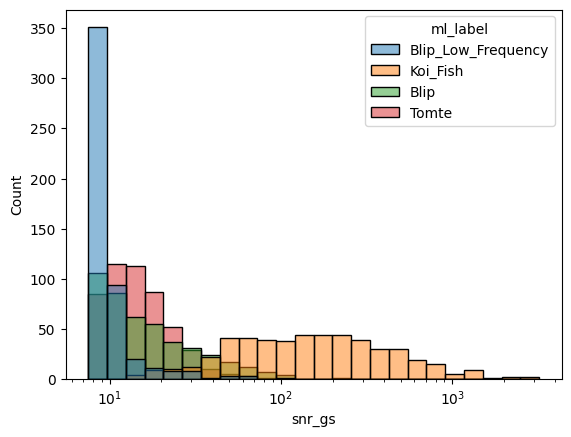

In [37]:
sns.histplot(df.query("ifo == 'L1'"), x='snr_gs', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

<AxesSubplot: xlabel='snr_gs', ylabel='Count'>

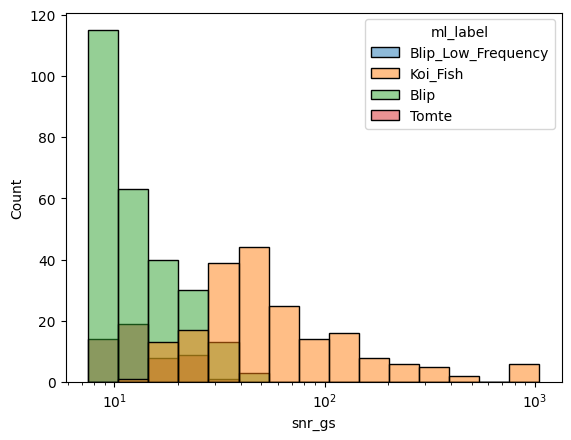

In [38]:
sns.histplot(df.query("ifo == 'V1'"), x='snr_gs', hue='ml_label', hue_order=ml_types[::-1], log_scale=True)

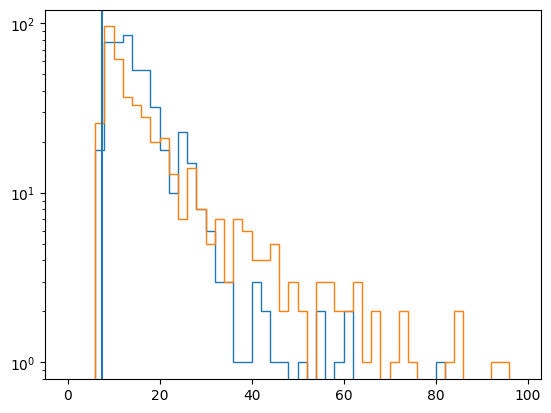

In [24]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.hist(dt['snr_gs'], bins=np.arange(0,100,2), histtype='step', log=True);
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist(dt['snr_gs'], bins=np.arange(0,100,2), histtype='step', log=True);
plt.axvline(7.5)

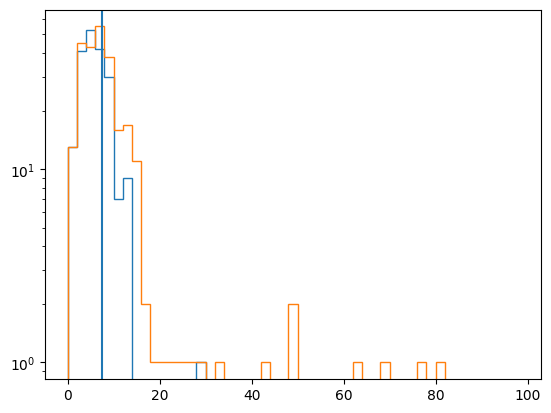

In [42]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.hist(snr(dt['residual']), bins=np.arange(0,100,2), histtype='step', log=True);
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist(snr(dt['residual']), bins=np.arange(0,100,2), histtype='step', log=True);
plt.axvline(7.5)

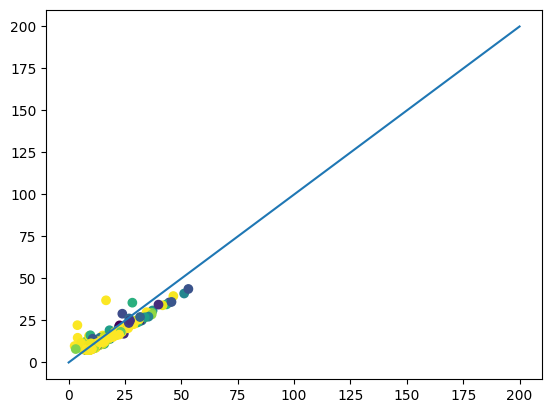

In [13]:
dt = df.query("ifo == 'V1' and ml_label == 'Blip'")
plt.scatter(dt['snr'], dt['snr_gs'], c=dt['ml_confidence'])
plt.plot([0,200],[0,200])
#plt.xscale('log')
#plt.yscale('log')

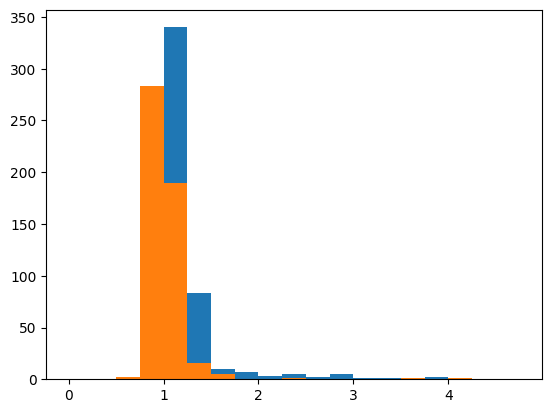

In [29]:
dt = df.query("ifo == 'L1' and ml_label == 'Blip_Low_Frequency'")
plt.hist(dt['power'], bins=np.arange(0,5,0.25));
plt.hist(dt['residual'], bins=np.arange(0,5,0.25));

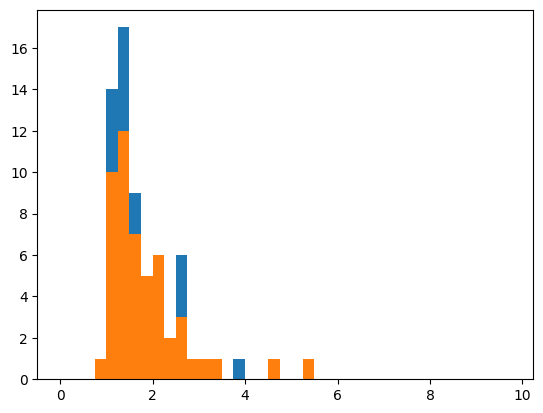

In [30]:
dt = df.query("ifo == 'V1' and ml_label == 'Tomte'")
plt.hist(dt['power'], bins=np.arange(0,10,0.25));
plt.hist(dt['residual'], bins=np.arange(0,10,0.25));

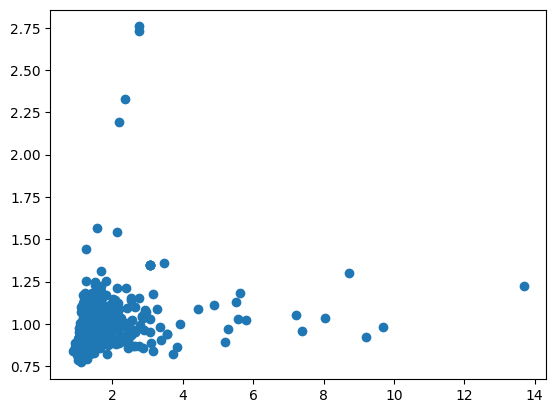

In [37]:
dt = df.query("ifo == 'L1' and ml_label == 'Tomte'")
plt.scatter(dt['power'], dt['residual'])

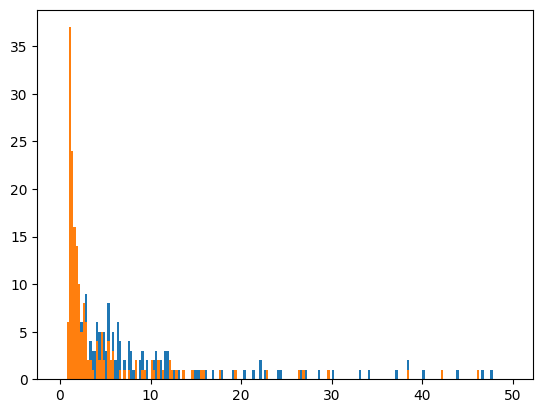

In [241]:

plt.hist(dt['power'], bins=np.arange(0,50,0.25));
plt.hist(dt['residual'], bins=np.arange(0,50,0.25));

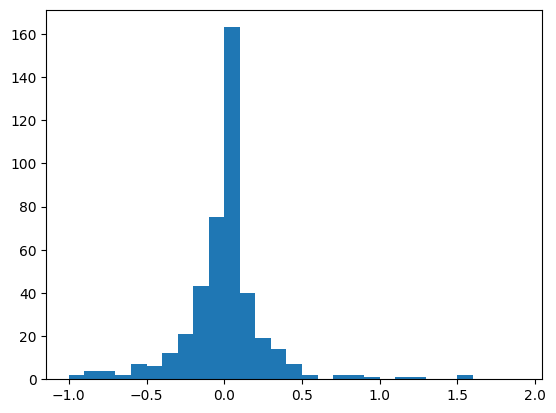

In [47]:
dt = df.query("ifo == 'L1' and ml_label == 'Blip'")
plt.hist((dt['residual']-1.)/(dt['power']-1.), bins=np.arange(-1,2,0.1));

(0.0, 30.0)

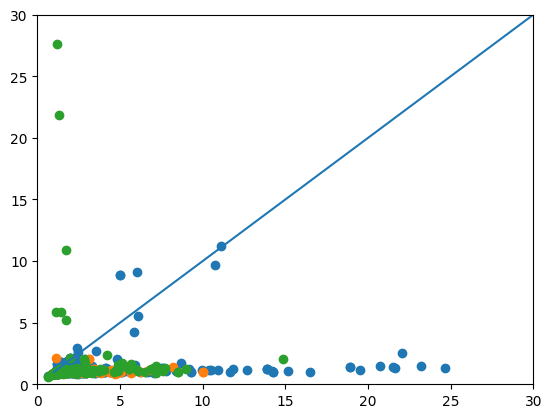

In [59]:
dt = df.query("ifo == 'H1' and ml_label == 'Blip'")
plt.scatter(dt['power'], dt['residual'])
dt = df.query("ifo == 'H1' and ml_label == 'Tomte'")
plt.scatter(dt['power'], dt['residual'])
dt = df.query("ifo == 'H1' and ml_label == 'Blip_Low_Frequency'")
plt.scatter(dt['power'], dt['residual'])
plt.plot([1,30],[1,30])
plt.xlim(0,30)
plt.ylim(0,30)

In [65]:
df['snr_original'] = snr(df['power'])
df['snr_residual'] = snr(df['residual'])

/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


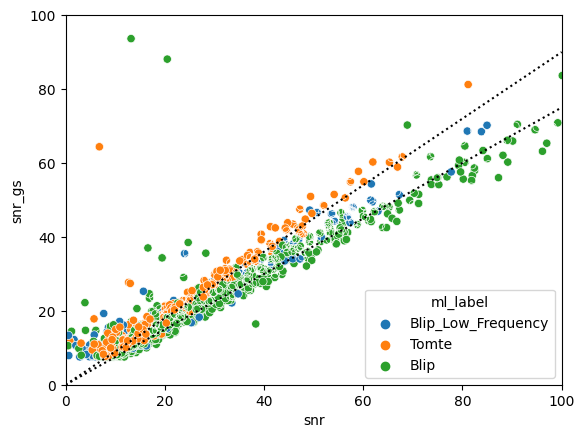

In [84]:
sns.scatterplot(df,
                    x = 'snr', y='snr_gs',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,90], c='k', ls=':')
plt.plot([0,100],[0,75], c='k', ls=':')

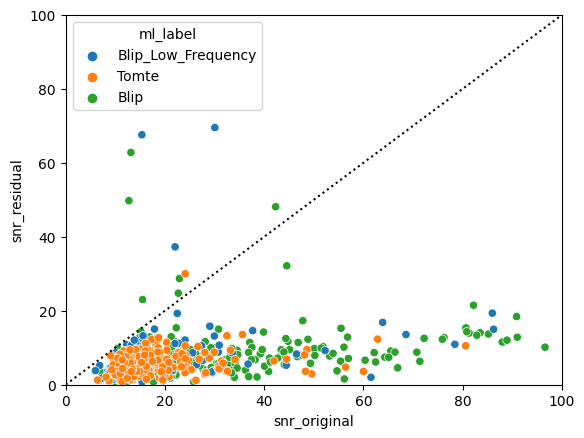

In [67]:
sns.scatterplot(df.query("ifo == 'L1' and ml_label != 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')

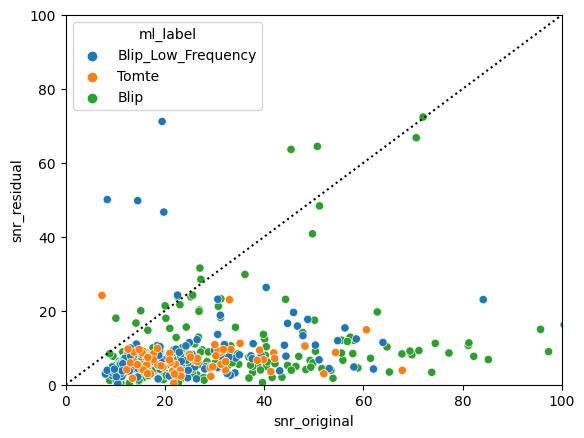

In [73]:
sns.scatterplot(df.query("ifo == 'H1' and ml_label != 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,100)
plt.ylim(0,100)
plt.plot([0,100],[0,100], c='k', ls=':')

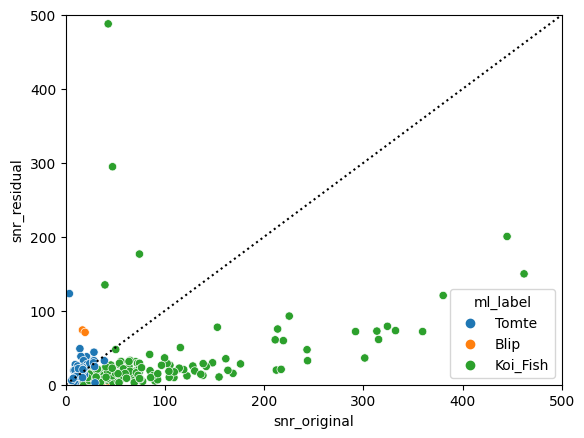

In [100]:
sns.scatterplot(df.query("ifo == 'V1'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ml_label', hue_order=['Tomte','Blip','Koi_Fish'])
plt.xlim(0,500)
plt.ylim(0,500)
plt.plot([0,500],[0,500], c='k', ls=':')

In [102]:
df1 = pd.read_json('../data/all_PE.json')
df1['snr_original'] = snr(df1['power'])
df1['snr_residual'] = snr(df1['residual'])
df1['ratio'] = snr(df1['residual'])/snr(df1['power'])

/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


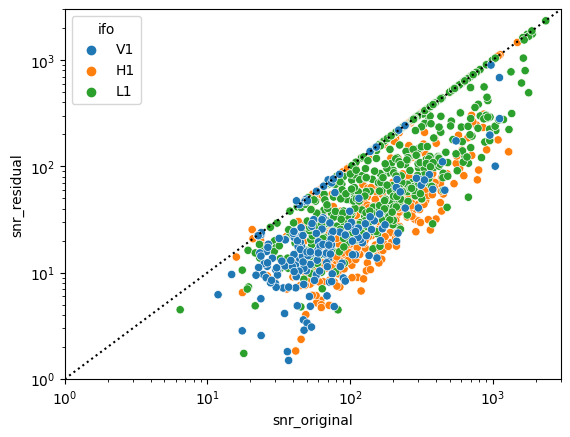

In [107]:
sns.scatterplot(df1.query("ml_label == 'Koi_Fish'"),
                    x = 'snr_original', y='snr_residual',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(1,3000)
plt.ylim(1,3000)
plt.plot([1,3000],[1,3000], c='k', ls=':')
plt.xscale('log')
plt.yscale('log')

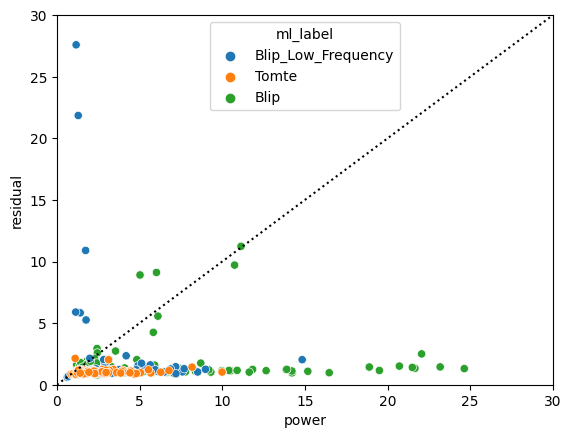

In [63]:
sns.scatterplot(df.query("ifo == 'H1' and ml_label != 'Koi_Fish'"),
                    x = 'power', y='residual',
                    hue='ml_label', hue_order=['Blip_Low_Frequency','Tomte','Blip'])
plt.xlim(0,30)
plt.ylim(0,30)
plt.plot([0,30],[0,30], c='k', ls=':')

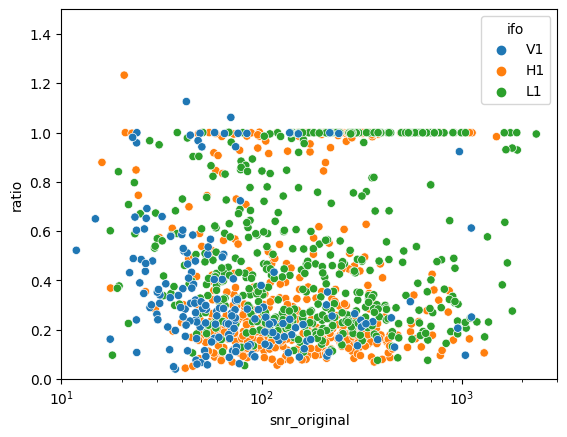

In [113]:
sns.scatterplot(df1.query("ml_label == 'Koi_Fish'"),
                    x = 'snr_original', y='ratio',
                    hue='ifo', hue_order=['V1', 'H1', 'L1'])
plt.xlim(10,3000)
plt.ylim(0,1.5)
plt.xscale('log')

(0.0, 500.0)

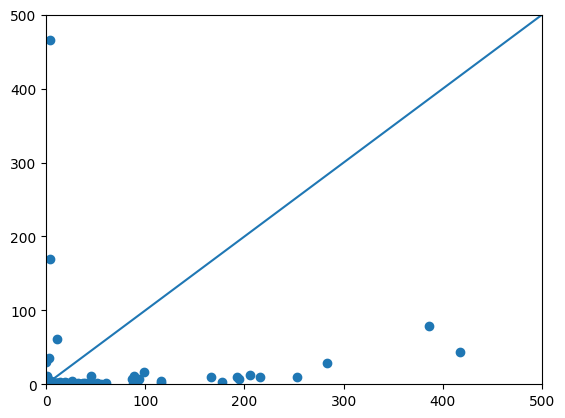

In [63]:
dt = df.query("ifo == 'V1'")
plt.scatter(dt['power']-1., dt['residual']-1.)
plt.plot([0,500],[0,500])
plt.xlim(0,500)
plt.ylim(0,500)

(0.0, 500.0)

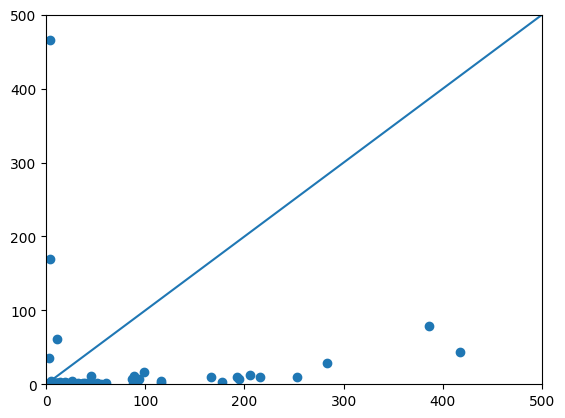

In [66]:
dt = df.query("ifo == 'V1' and ml_label == 'Koi_Fish'")
plt.scatter(dt['power']-1., dt['residual']-1.)
plt.plot([0,500],[0,500])
plt.xlim(0,500)
plt.ylim(0,500)

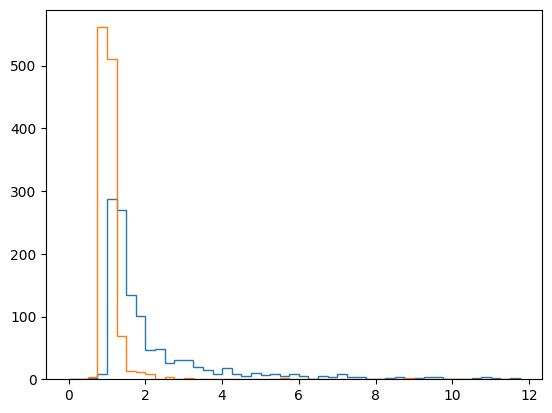

In [60]:
plt.hist(df.query("ml_label == 'Blip'")['power'], bins=np.arange(0,12,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step');

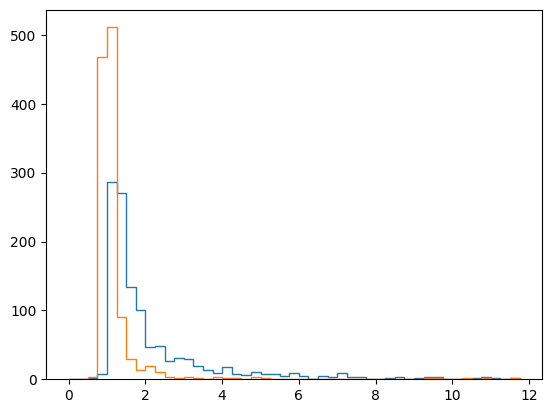

In [217]:
plt.hist(df.query("ml_label == 'Blip'")['power'], bins=np.arange(0,12,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step');

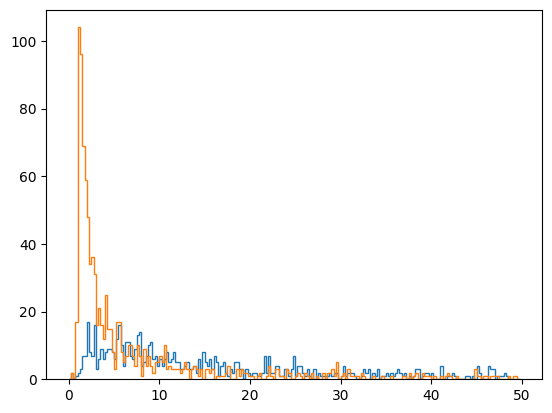

In [218]:
plt.hist(df.query("ml_label == 'Koi_Fish'")['power'], bins=np.arange(0,50,0.25), histtype='step');
plt.hist(df.query("ml_label == 'Koi_Fish'")['residual'], bins=np.arange(0,50,0.25), histtype='step');

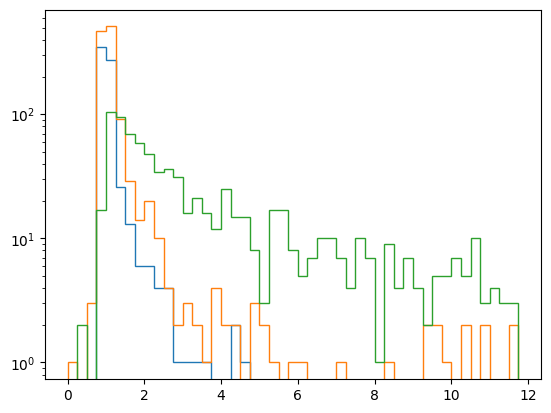

In [219]:
plt.hist(df.query("ml_label == 'Tomte'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);
plt.hist(df.query("ml_label == 'Blip'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);
plt.hist(df.query("ml_label == 'Koi_Fish'")['residual'], bins=np.arange(0,12,0.25), histtype='step', log=True);

(7.0, 20000.0)

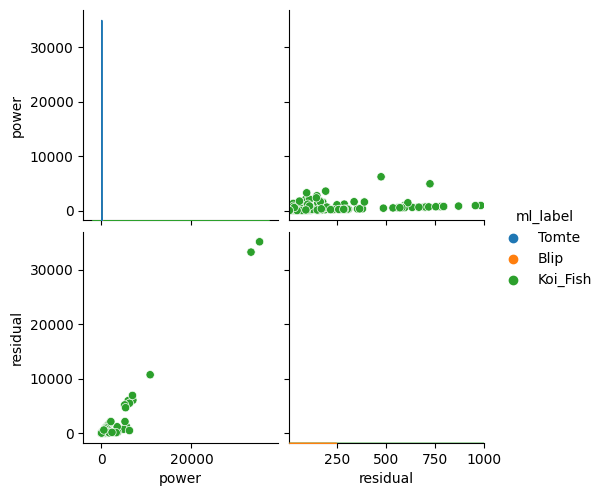

In [220]:
sns.pairplot(df.loc[df['ifo'] == 'L1'],
                vars=['power','residual'],
                hue='ml_label', hue_order=ml_types)
plt.xlim(10,1000)
plt.ylim(7,2e4)

(7, 20000.0)

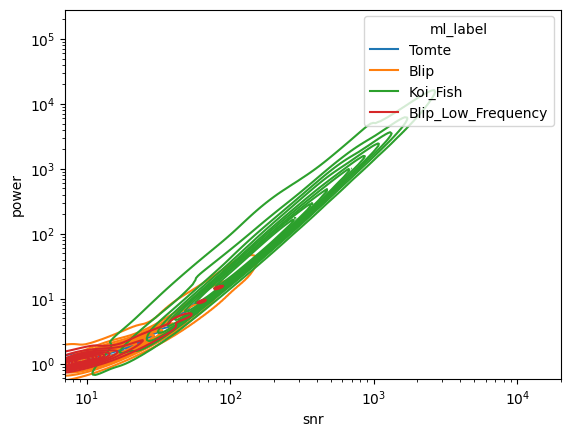

In [18]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='snr', y='power',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(7,2e4)

<AxesSubplot: xlabel='power', ylabel='residual'>

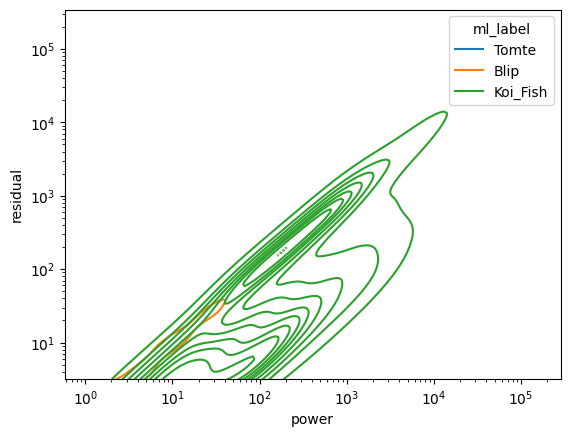

In [172]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='power', y='residual',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)

(5, 2000.0)

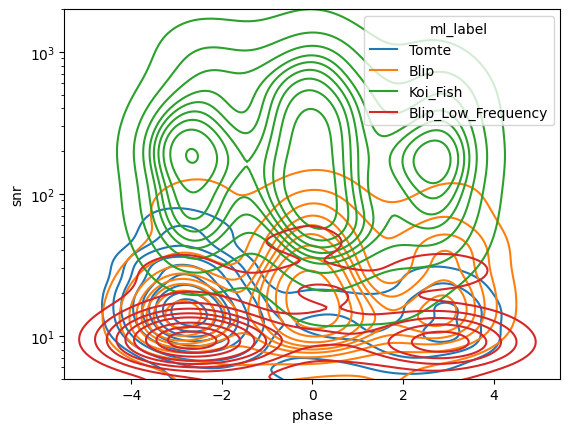

In [271]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='phase', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=(False,True), common_norm=False)
plt.ylim(5,2e3)

(-4000.0, 4000.0)

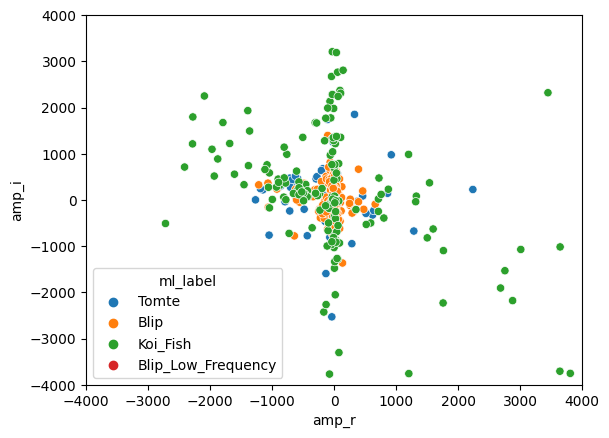

In [45]:
sns.scatterplot(df.loc[df['ifo'] == 'V1'],
                x='amp_r', y='amp_i',
                hue='ml_label', hue_order=ml_types)
plt.xlim(-4e3,4e3)
plt.ylim(-4e3,4e3)

(5, 2000.0)

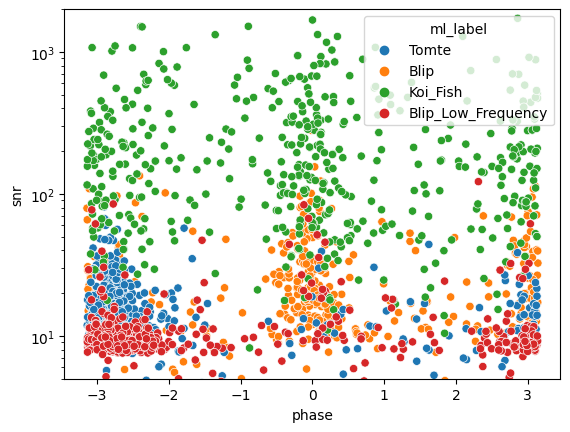

In [272]:
sns.scatterplot(df.loc[df['ifo'] == 'L1'],
                x='phase', y='snr',
                hue='ml_label', hue_order=ml_types)
plt.yscale('log')
plt.ylim(5,2e3)

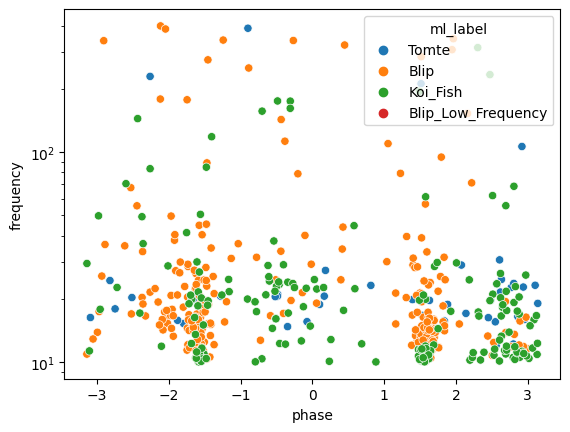

In [310]:
sns.scatterplot(df.loc[df['ifo'] == 'V1'],
                x='phase', y='frequency',
                hue='ml_label', hue_order=ml_types)
plt.yscale('log')

(5, 2000.0)

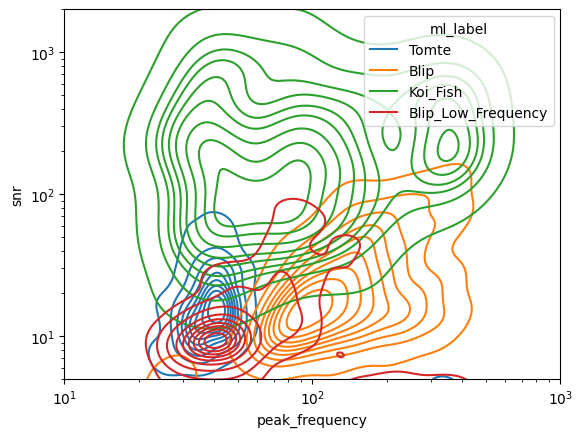

In [273]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

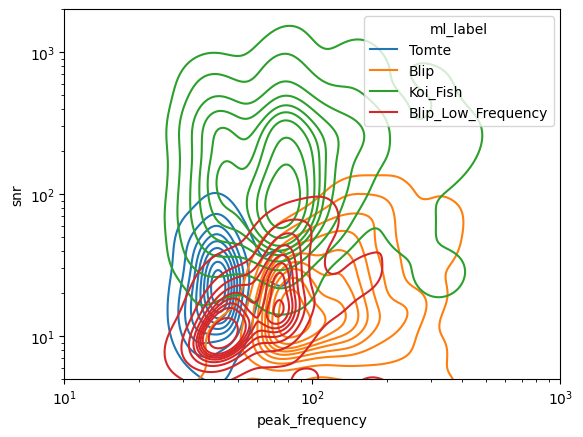

In [275]:
sns.kdeplot(df.loc[df['ifo'] == 'H1'],
                x='peak_frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

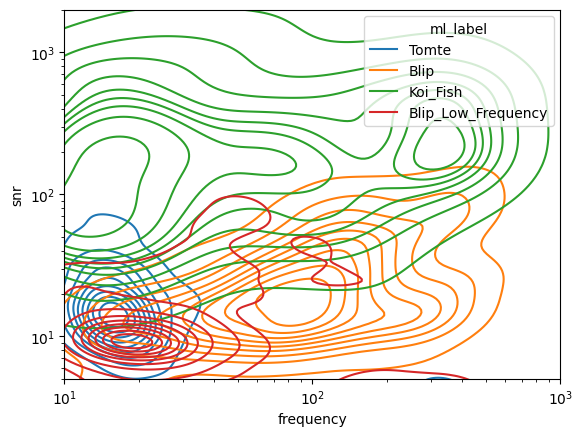

In [276]:
sns.kdeplot(df.loc[df['ifo'] == 'L1'],
                x='frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(5, 2000.0)

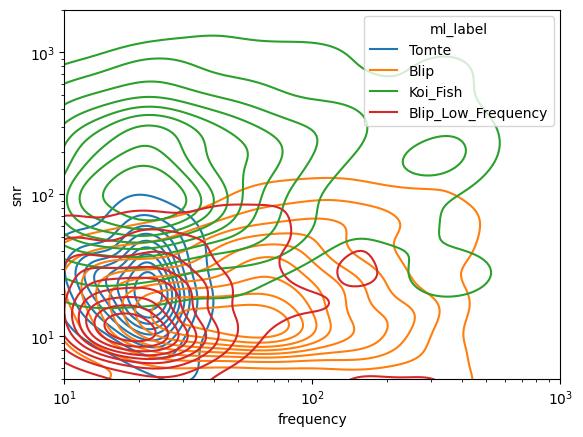

In [277]:
sns.kdeplot(df.loc[df['ifo'] == 'H1'],
                x='frequency', y='snr',
                hue='ml_label', hue_order=ml_types,
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(5,2e3)

(0.25, 8)

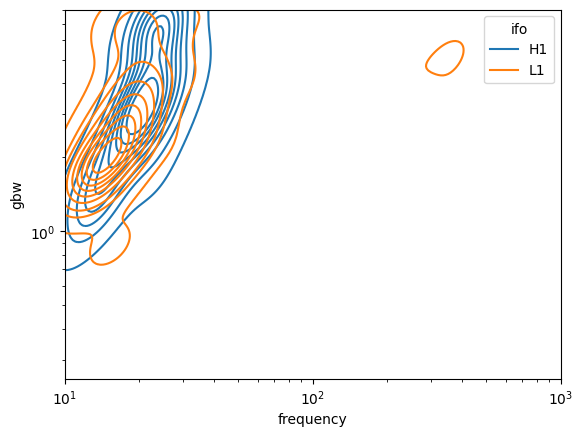

In [282]:
sns.kdeplot(df.query("ml_label == 'Tomte'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

(0.25, 8)

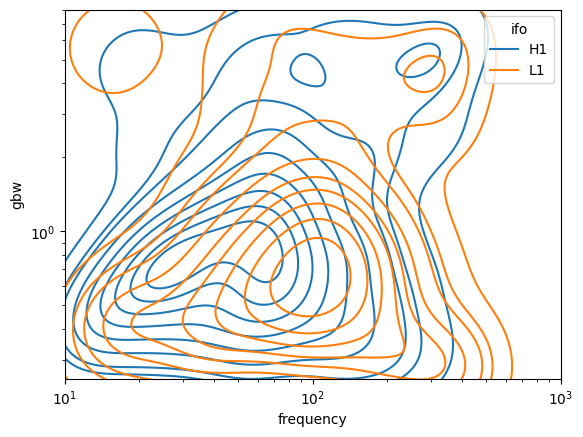

In [283]:
sns.kdeplot(df.query("ml_label == 'Blip'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

(0.25, 8)

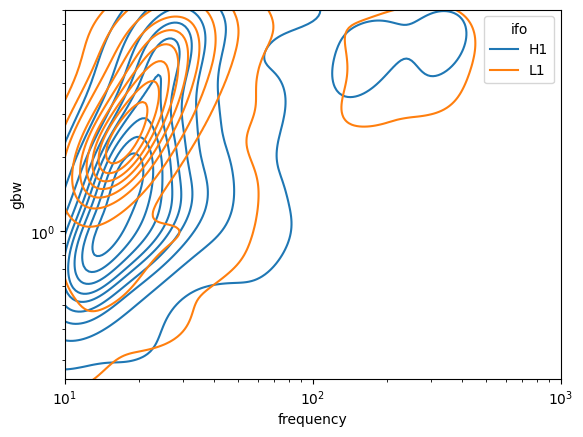

In [285]:
sns.kdeplot(df.query("ml_label == 'Blip_Low_Frequency'"),
                x='frequency', y='gbw',
                hue='ifo',
                log_scale=True, common_norm=False)
plt.xlim(10,1000)
plt.ylim(0.25,8)

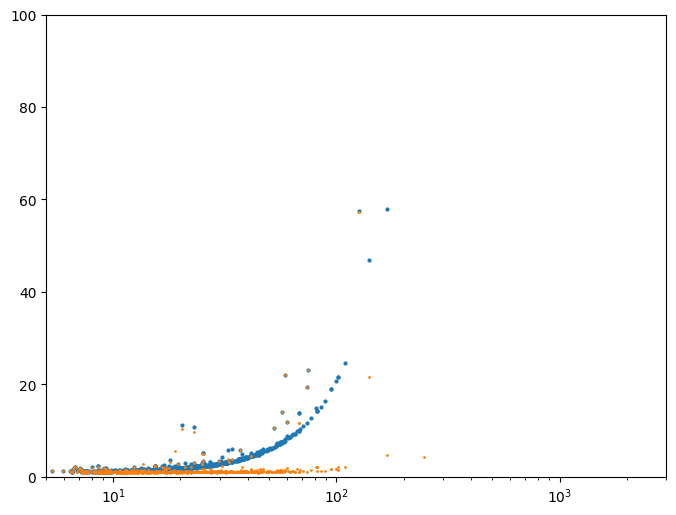

In [34]:
dt = df.query("ifo == 'H1' and not ml_label == 'Koi_Fish'")
plt.figure(figsize=(8,6))
plt.scatter(dt['snr'], dt['power'], s=4)
plt.scatter(dt['snr'], dt['residual'], s=1)
plt.xlim(5,3000)
plt.ylim(0, 100)
plt.xscale('log')

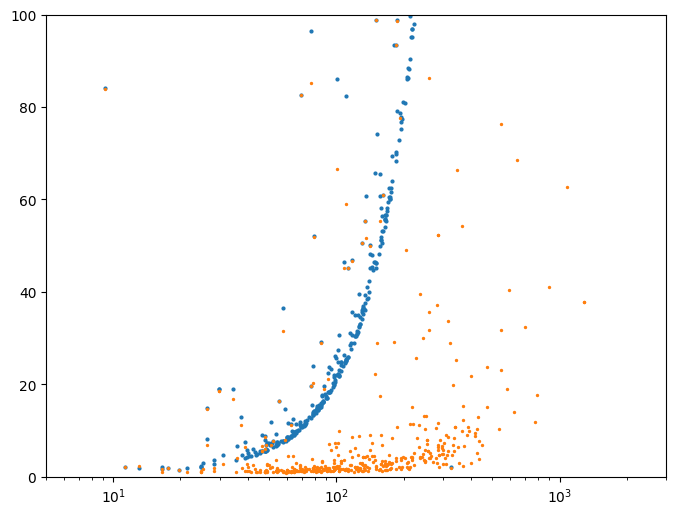

In [33]:
dt = df.query("ifo == 'H1' and ml_label == 'Koi_Fish'")
plt.figure(figsize=(8,6))
plt.scatter(dt['snr'], dt['power'], s=4)
plt.scatter(dt['snr'], dt['residual'], s=2)
plt.xlim(5,3000)
plt.ylim(0, 100)
plt.xscale('log')